# L5. Informed Search Strategies - PacMan World

Heuristic search plays a significant role in game AI. It uses rules of thumb, or heuristic functions, to efficiently navigate vast game state spaces and find optimal or near-optimal moves, outperforming brute-force methods.

PAC-MAN is one of the most popular game which also can be used as environment to test the "level of intelegence" of Problem-Solving Agents.

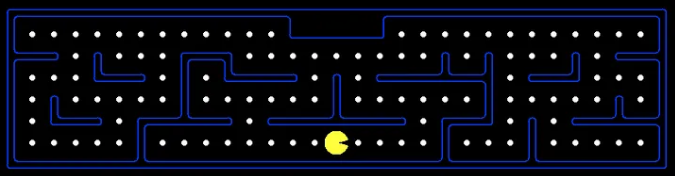

**Goal**: Help Pac-man Agent find its way through the maze. The Agent is required to visit every food pellet at least once on oits way to the exit.

**Techniques**: Heuristic Search - A*

## A* Search

The A* algorithm's efficiency comes from its smart evaluation of paths using three key components: **g(n), h(n)**, and **f(n)**. These components work together to guide the search process toward the most promising paths.

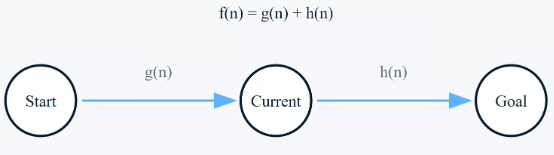

* **g(n)** = sum of edge costs from start to n

* heuristic function **h(n)** = estimate of lowest cost path from n to goal

### The heuristic 

In our example the **Euclidean distance** is used as a heuristic.

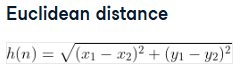



Let’s take a look at a quick graphic to help illustrate this.

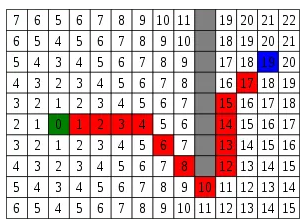

Let’s say node(0) is our starting position and node(19) is our end position. Let’s also say that our current node is at the the red square node(4).

So let’s calculate the distance. 

If we take a look we’ll see that if we go over 7 spaces and up 3 spaces, we’ve reached our end node (node(19)).

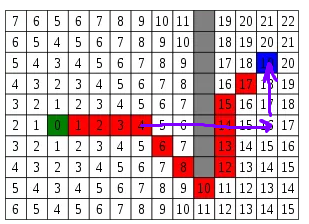

a² + b² = c². After we’ve applied this, we’ll see that currentNode.h = 7² + 3². Or currentNode.h = sqrt(58).


## Maze & State Space

Pacman World is a case of maze.

Mazes are a classic example of a state-space search problem in AI. 

* **State**: Each position in the maze (e.g., a specific grid cell) represents a state.
* **Actions**: The ***possible*** moves an agent can make from a given state, such as moving *up, down, left*, or *right*.
* **Goal**: The state where the agent needs to arrive, such as the maze's exit or the cell with a treasure.

       

### Maze generator

To generate a maze in this assignmenr you can use our simple Maze generator (from prev. Lab) as a base, and then customise it to get a PacMan World.

The `maze` can be represented as a `2D array`, where:
* 0 represents a wall , 
* and 1 represents an open path,
* 2 represents food

In [1]:
n=10

In [2]:
from src.mazeData import makeMaze

In [3]:
maze1=makeMaze(n)
maze1

array([[1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 2, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 2, 1, 1, 2, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 2, 2, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])

Let's visualize our Maze as a Grid with Seaborn:
* a pink cell represent an initial state
* a green cell - a goal

In [4]:
from src.mazeData import draw_maze

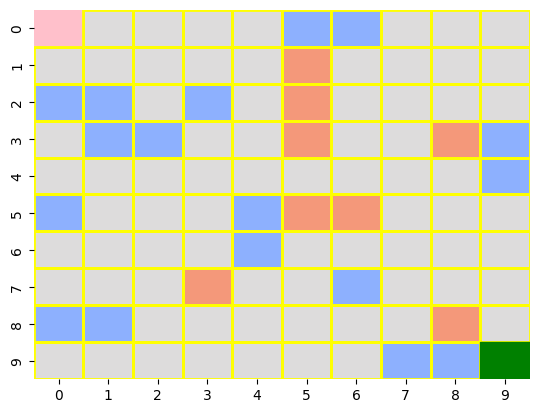

In [5]:
draw_maze(maze1)

Now we need to define AVAILABLE actions.

In [6]:
from src.mazeData import defineMazeAvailableActions

In [7]:
mazeAvalActs=defineMazeAvailableActions(maze1)
mazeAvalActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'right', 'down'],
 (0, 4): ['left', 'down'],
 (0, 5): [],
 (0, 6): [],
 (0, 7): ['right', 'down'],
 (0, 8): ['left', 'right', 'down'],
 (0, 9): ['left', 'down'],
 (1, 0): ['up', 'right'],
 (1, 1): ['left', 'up', 'right'],
 (1, 2): ['left', 'up', 'right', 'down'],
 (1, 3): ['left', 'up', 'right'],
 (1, 4): ['left', 'up', 'right', 'down'],
 (1, 5): ['left', 'right', 'down'],
 (1, 6): ['left', 'right', 'down'],
 (1, 7): ['left', 'up', 'right', 'down'],
 (1, 8): ['left', 'up', 'right', 'down'],
 (1, 9): ['left', 'up', 'down'],
 (2, 0): [],
 (2, 1): [],
 (2, 2): ['up'],
 (2, 3): [],
 (2, 4): ['up', 'right', 'down'],
 (2, 5): ['left', 'up', 'right', 'down'],
 (2, 6): ['left', 'up', 'right', 'down'],
 (2, 7): ['left', 'up', 'right', 'down'],
 (2, 8): ['left', 'up', 'right', 'down'],
 (2, 9): ['left', 'up'],
 (3, 0): ['down'],
 (3, 1): [],
 (3, 2): [],
 (3, 3): ['right', 'down'

In [10]:
mazeAvalActs[(7,3)] # correct: food is there, but it is possible to move L,U,R,D from it

['left', 'up', 'right', 'down']

In [11]:
maze1[7,3]

np.int64(2)

Next we need to define the **Transition (Transformation) Model (TM)**

Transition Model: Describes what each action does. RESULT(s, a) returns the state that results from performing action "a" in state "s".

In [12]:
from src.mazeData import makeMazeTransformationModel

Since the TM describes what each action does the set of available actions is used as a input for it.

In [13]:
maze1TM=makeMazeTransformationModel(mazeAvalActs)
maze1TM

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (0, 5): {},
 (0, 6): {},
 (0, 7): {'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'right': (0, 9), 'down': (1, 8)},
 (0, 9): {'left': (0, 8), 'down': (1, 9)},
 (1, 0): {'up': (0, 0), 'right': (1, 1)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'right': (1, 4)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'right': (1, 5), 'down': (2, 4)},
 (1, 5): {'left': (1, 4), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'right': (1, 7), 'down': (2, 6)},
 (1, 7): {'left': (1, 6), 'up': (0, 7), 'right': (1, 8), 'down': (2, 7)},
 (1, 8): {'left': (1, 7), 'up': (0, 8), 'right': (1, 9), 'do

The data above is our graph data to build the `MazeGraph`

### Maze Graph

In [14]:
from src.graphProblemClass import GraphProblem

Based on this dictionary we need to build a graph

However, we need to create the derived class - `mazeGraph`

In [15]:
from src.maze2025GraphClass import mazeGraph

In [16]:
mazeWorldGraph1 = mazeGraph(maze1TM)

In [17]:
mazeWorldGraph1.graph_dict

{(0, 0): {(0, 1): 0, (1, 0): 1},
 (0, 1): {(0, 0): 0, (0, 2): 0, (1, 1): 1},
 (0, 2): {(0, 1): 0, (0, 3): 0, (1, 2): 1},
 (0, 3): {(0, 2): 0, (0, 4): 0, (1, 3): 1},
 (0, 4): {(0, 3): 0, (1, 4): 1},
 (0, 7): {(0, 8): 0, (1, 7): 1},
 (0, 8): {(0, 7): 0, (0, 9): 0, (1, 8): 1},
 (0, 9): {(0, 8): 0, (1, 9): 1},
 (1, 0): {(0, 0): 2, (1, 1): 0},
 (1, 1): {(1, 0): 0, (0, 1): 2, (1, 2): 0},
 (1, 2): {(1, 1): 0, (0, 2): 2, (1, 3): 0, (2, 2): 1},
 (1, 3): {(1, 2): 0, (0, 3): 2, (1, 4): 0},
 (1, 4): {(1, 3): 0, (0, 4): 2, (1, 5): 0, (2, 4): 1},
 (1, 5): {(1, 4): 0, (1, 6): 0, (2, 5): 1},
 (1, 6): {(1, 5): 0, (1, 7): 0, (2, 6): 1},
 (1, 7): {(1, 6): 0, (0, 7): 2, (1, 8): 0, (2, 7): 1},
 (1, 8): {(1, 7): 0, (0, 8): 2, (1, 9): 0, (2, 8): 1},
 (1, 9): {(1, 8): 0, (0, 9): 2, (2, 9): 1},
 (2, 2): {(1, 2): 2},
 (2, 4): {(1, 4): 2, (2, 5): 0, (3, 4): 1},
 (2, 5): {(2, 4): 0, (1, 5): 2, (2, 6): 0, (3, 5): 1},
 (2, 6): {(2, 5): 0, (1, 6): 2, (2, 7): 0, (3, 6): 1},
 (2, 7): {(2, 6): 0, (1, 7): 2, (2, 8): 0, 

In [18]:
mazeWorldGraph1.get((0,0))

{(0, 1): 0, (1, 0): 1}

In [19]:
from src.mazeData import mazeStatesLocations

In [20]:
list(maze1TM.keys())

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

In [21]:
mazeWorldGraph2 = mazeGraph(maze1TM, mazeStatesLocations(list(maze1TM.keys())))

In [22]:
mazeWorldGraph2.nodes()[:5]

[(4, 0), (5, 1), (8, 9), (2, 2), (6, 2)]

In [23]:
mazeWorldGraph2.locations

{(0, 0): (0, 0),
 (0, 1): (100, 0),
 (0, 2): (200, 0),
 (0, 3): (300, 0),
 (0, 4): (400, 0),
 (0, 5): (500, 0),
 (0, 6): (600, 0),
 (0, 7): (700, 0),
 (0, 8): (800, 0),
 (0, 9): (900, 0),
 (1, 0): (0, 100),
 (1, 1): (100, 100),
 (1, 2): (200, 100),
 (1, 3): (300, 100),
 (1, 4): (400, 100),
 (1, 5): (500, 100),
 (1, 6): (600, 100),
 (1, 7): (700, 100),
 (1, 8): (800, 100),
 (1, 9): (900, 100),
 (2, 0): (0, 200),
 (2, 1): (100, 200),
 (2, 2): (200, 200),
 (2, 3): (300, 200),
 (2, 4): (400, 200),
 (2, 5): (500, 200),
 (2, 6): (600, 200),
 (2, 7): (700, 200),
 (2, 8): (800, 200),
 (2, 9): (900, 200),
 (3, 0): (0, 300),
 (3, 1): (100, 300),
 (3, 2): (200, 300),
 (3, 3): (300, 300),
 (3, 4): (400, 300),
 (3, 5): (500, 300),
 (3, 6): (600, 300),
 (3, 7): (700, 300),
 (3, 8): (800, 300),
 (3, 9): (900, 300),
 (4, 0): (0, 400),
 (4, 1): (100, 400),
 (4, 2): (200, 400),
 (4, 3): (300, 400),
 (4, 4): (400, 400),
 (4, 5): (500, 400),
 (4, 6): (600, 400),
 (4, 7): (700, 400),
 (4, 8): (800, 400),
 

In [24]:
mazeWorldGraph2.get((0, 1), (0,2))

0

Let's try to show the graph of our Maze with PyVis

In [25]:
from pyvis.network import Network 

In [26]:
net_maze = Network( heading="Lab5. Examples of PacMan World",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
                directed = True
) # do this


In [27]:
nodeColors={
    "wall":"red",
    "path": "white",
    "food":"yellow"
}

In [28]:
nodeColorsList=[]

for node in mazeWorldGraph2.origin.keys():
    if maze1[node[0],node[1]]==1:
        nodeColorsList.append(nodeColors["path"])
    elif maze1[node[0],node[1]]==2:
        nodeColorsList.append(nodeColors["food"])
    else:
        nodeColorsList.append(nodeColors["wall"])


In [29]:
nodes=["-".join(str(item) for item in el) for el in mazeWorldGraph2.origin.keys()]


In [30]:
x_coords = []
y_coords = []

for node in mazeWorldGraph2.origin.keys():
    x,y=mazeWorldGraph2.getLocation(node)
    x_coords.append(x)
    y_coords.append(y)



In [31]:
sizes=[10]*len(nodes)

In [32]:
#hidden labels, and hover titles
net_maze.add_nodes(nodes, color=nodeColorsList, x=x_coords, y=y_coords, size=sizes, title=nodes)

In [33]:
for node in net_maze.nodes:
    node['label']=''

In [34]:
net_maze.nodes

[{'color': 'white',
  'x': 0,
  'y': 0,
  'size': 10,
  'title': '0-0',
  'id': '0-0',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 100,
  'y': 0,
  'size': 10,
  'title': '0-1',
  'id': '0-1',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 200,
  'y': 0,
  'size': 10,
  'title': '0-2',
  'id': '0-2',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 300,
  'y': 0,
  'size': 10,
  'title': '0-3',
  'id': '0-3',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 400,
  'y': 0,
  'size': 10,
  'title': '0-4',
  'id': '0-4',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'red',
  'x': 500,
  'y': 0,
  'size': 10,
  'title': '0-5',
  'id': '0-5',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'red',
  'x': 600,
  'y': 0,
  'size': 10,
  'title': '0-6',
  'id': '0-6',

In [35]:
mazeWorldGraph2.origin[(0,0)]

{'right': (0, 1), 'down': (1, 0)}

In [36]:
from src.mazeData import intTupleTostr

In [37]:
intTupleTostr((0,0))

'0-0'

In [38]:
mazeWorldGraph2.origin

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (0, 5): {},
 (0, 6): {},
 (0, 7): {'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'right': (0, 9), 'down': (1, 8)},
 (0, 9): {'left': (0, 8), 'down': (1, 9)},
 (1, 0): {'up': (0, 0), 'right': (1, 1)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'right': (1, 4)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'right': (1, 5), 'down': (2, 4)},
 (1, 5): {'left': (1, 4), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'right': (1, 7), 'down': (2, 6)},
 (1, 7): {'left': (1, 6), 'up': (0, 7), 'right': (1, 8), 'down': (2, 7)},
 (1, 8): {'left': (1, 7), 'up': (0, 8), 'right': (1, 9), 'do

In [39]:
edge_weights = {(intTupleTostr(k), intTupleTostr(v2)) : k2 for k, v in mazeWorldGraph2.origin.items() for k2, v2 in v.items()}#actions
edge_weights

{('0-0', '0-1'): 'right',
 ('0-0', '1-0'): 'down',
 ('0-1', '0-0'): 'left',
 ('0-1', '0-2'): 'right',
 ('0-1', '1-1'): 'down',
 ('0-2', '0-1'): 'left',
 ('0-2', '0-3'): 'right',
 ('0-2', '1-2'): 'down',
 ('0-3', '0-2'): 'left',
 ('0-3', '0-4'): 'right',
 ('0-3', '1-3'): 'down',
 ('0-4', '0-3'): 'left',
 ('0-4', '1-4'): 'down',
 ('0-7', '0-8'): 'right',
 ('0-7', '1-7'): 'down',
 ('0-8', '0-7'): 'left',
 ('0-8', '0-9'): 'right',
 ('0-8', '1-8'): 'down',
 ('0-9', '0-8'): 'left',
 ('0-9', '1-9'): 'down',
 ('1-0', '0-0'): 'up',
 ('1-0', '1-1'): 'right',
 ('1-1', '1-0'): 'left',
 ('1-1', '0-1'): 'up',
 ('1-1', '1-2'): 'right',
 ('1-2', '1-1'): 'left',
 ('1-2', '0-2'): 'up',
 ('1-2', '1-3'): 'right',
 ('1-2', '2-2'): 'down',
 ('1-3', '1-2'): 'left',
 ('1-3', '0-3'): 'up',
 ('1-3', '1-4'): 'right',
 ('1-4', '1-3'): 'left',
 ('1-4', '0-4'): 'up',
 ('1-4', '1-5'): 'right',
 ('1-4', '2-4'): 'down',
 ('1-5', '1-4'): 'left',
 ('1-5', '1-6'): 'right',
 ('1-5', '2-5'): 'down',
 ('1-6', '1-5'): 'left'

In [40]:
edges=[]

for node_source in mazeWorldGraph2.nodes():
    for node_target, action in mazeWorldGraph2.get(node_source).items():
        #node_target or node_source is a tuple -> convert to str
        if (intTupleTostr(node_source),intTupleTostr(node_target)) not in edges:
            net_maze.add_edge(intTupleTostr(node_source),intTupleTostr(node_target), title=edge_weights[(intTupleTostr(node_source),intTupleTostr(node_target))], smooth=True, lable="")
            edges.append((intTupleTostr(node_source),intTupleTostr(node_target)))

In [41]:
('1-0','0-0') in edges

True

In [42]:
('0-0','1-0') in edges

True

In [ ]:
# edges=[]

# for node_source in mazeWorldGraph2.nodes():
#     for node_target, action in mazeWorldGraph2.get(node_source).items():
#         #node_target or node_source is a tuple -> convert to str
#         if (intTupleTostr(node_source),intTupleTostr(node_target)) not in edges and (intTupleTostr(node_target), intTupleTostr(node_source)):
#             net_maze.add_edge(intTupleTostr(node_source),intTupleTostr(node_target), label=edge_weights[(intTupleTostr(node_source),intTupleTostr(node_target))])
#             edges.append((intTupleTostr(node_source),intTupleTostr(node_target)))
            



In [43]:

# Enable dynamic edges for separate curved arrows.
#net_maze.set_edge_smooth('dynamic')
net_maze.toggle_physics(False)
net_maze.show("graph1.html", notebook=False)

graph1.html


### Maze Problem formulation

Explore the derived *class MazeProblem(Problem)* for our Maze World example

In [44]:
from src.mazeProblemClass import MazeProblem

In [45]:
initState, goalState=(0,1),(1,2)

In [46]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph2)

In [47]:
testState=(0,2)

In [48]:
mp1.actions(testState)

['left', 'right', 'down']

Let's check that the Euclidean distance between one and two dimensional points (a start & a goal) calculated correctly

In [49]:
from src.nodeClass import Node

In [50]:
import math

In [51]:
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2)) 

1.41


## Problem Solving Agent in PacMan World

We also need to develop  the `A_StarSearchAgentProgram` to process Pacman World with A* algorithm.

In [142]:
from src.PS_agentPrograms import A_StarSearchAgentProgram

Now we need to create the instance of the A* based on Euclidean distance used for h(n)

In [53]:
f1=A_StarSearchAgentProgram(math.dist)

Check how it works with our instance of the Pacman world

In [54]:
f1(mp1)

Hi
[(1.414, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
[(1.0, <Node (0, 2)>), (2.236, <Node (0, 0)>), (2.0, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(1.0, <Node (1, 2)>), (1.414, <Node (0, 3)>), (2.0, <Node (1, 1)>), (2.236, <Node (0, 0)>)]
The node (1, 2) is extracted from frontier:
We have found our goal: (1, 2)


<Node (1, 2)>

Perfect! We are ready to create the PS PacMan Agent based on this AP.

In [154]:
from src.agents import ProblemSolvingMazeAgentAstar

In [162]:
goalState=(1,2)

In [169]:
Astar_PacManAgent1=ProblemSolvingMazeAgentAstar(initState,mazeWorldGraph2,goalState)

In [170]:
Astar_PacManAgent1.goal

(1, 2)

In [171]:
testNode=(0,0)

In [172]:
Astar_PacManAgent1.program(mp1)

Hi
[(1.414, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
[(1.0, <Node (0, 2)>), (2.236, <Node (0, 0)>), (2.0, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(1.0, <Node (1, 2)>), (1.414, <Node (0, 3)>), (2.0, <Node (1, 1)>), (2.236, <Node (0, 0)>)]
The node (1, 2) is extracted from frontier:
We have found our goal: (1, 2)


<Node (1, 2)>

In [173]:
Astar_PacManAgent1(testNode)

Hi
[(2.236, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
[(1.414, <Node (0, 1)>), (3.0, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
[(1.0, <Node (0, 2)>), (3.0, <Node (1, 0)>), (2.0, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(1.0, <Node (1, 2)>), (1.414, <Node (0, 3)>), (2.0, <Node (1, 1)>), (3.0, <Node (1, 0)>)]
The node (1, 2) is extracted from frontier:
We have found our goal: (1, 2)
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right', 'down']


In [174]:
Astar_PacManAgent1(testNode)

I have already don my work. Find someone else


Let's create the **environment for our PacMan World**

In [144]:
from src.naigationEnvironmentClass import MazeNavigationEnvironment

In [134]:
PacmanWorld1=MazeNavigationEnvironment(mazeWorldGraph2)

In [124]:
PacmanWorld1.status.graph_dict

{(0, 0): {(0, 1): 0, (1, 0): 1},
 (0, 1): {(0, 0): 0, (0, 2): 0, (1, 1): 1},
 (0, 2): {(0, 1): 0, (0, 3): 0, (1, 2): 1},
 (0, 3): {(0, 2): 0, (0, 4): 0, (1, 3): 1},
 (0, 4): {(0, 3): 0, (1, 4): 1},
 (0, 7): {(0, 8): 0, (1, 7): 1},
 (0, 8): {(0, 7): 0, (0, 9): 0, (1, 8): 1},
 (0, 9): {(0, 8): 0, (1, 9): 1},
 (1, 0): {(0, 0): 2, (1, 1): 0},
 (1, 1): {(1, 0): 0, (0, 1): 2, (1, 2): 0},
 (1, 2): {(1, 1): 0, (0, 2): 2, (1, 3): 0, (2, 2): 1},
 (1, 3): {(1, 2): 0, (0, 3): 2, (1, 4): 0},
 (1, 4): {(1, 3): 0, (0, 4): 2, (1, 5): 0, (2, 4): 1},
 (1, 5): {(1, 4): 0, (1, 6): 0, (2, 5): 1},
 (1, 6): {(1, 5): 0, (1, 7): 0, (2, 6): 1},
 (1, 7): {(1, 6): 0, (0, 7): 2, (1, 8): 0, (2, 7): 1},
 (1, 8): {(1, 7): 0, (0, 8): 2, (1, 9): 0, (2, 8): 1},
 (1, 9): {(1, 8): 0, (0, 9): 2, (2, 9): 1},
 (2, 2): {(1, 2): 2},
 (2, 4): {(1, 4): 2, (2, 5): 0, (3, 4): 1},
 (2, 5): {(2, 4): 0, (1, 5): 2, (2, 6): 0, (3, 5): 1},
 (2, 6): {(2, 5): 0, (1, 6): 2, (2, 7): 0, (3, 6): 1},
 (2, 7): {(2, 6): 0, (1, 7): 2, (2, 8): 0, 

In [125]:
goalState=(2,4)
initState,goalState

((0, 1), (2, 4))

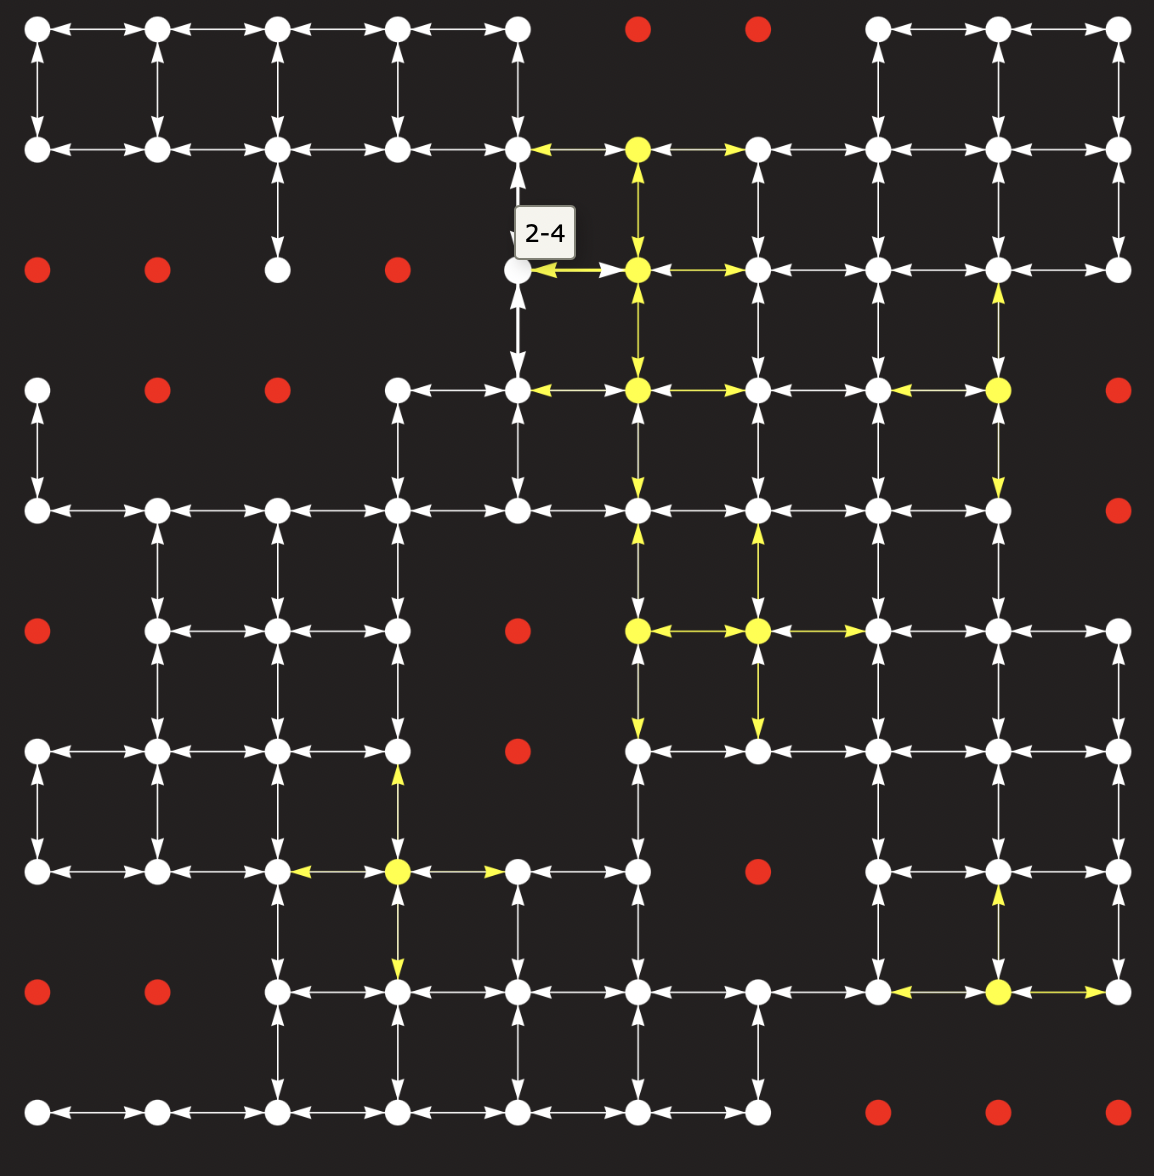

In [118]:
Astar_PacManAgent2=ProblemSolvingMazeAgentAstar(initState,mazeWorldGraph2,goalState)

In [119]:
Astar_PacManAgent2.performance

82

In [104]:
mp2=MazeProblem(initState,goalState,mazeWorldGraph2)

In [105]:
Astar_PacManAgent2.program(mp2)

Hi
[(3.606, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
[(2.828, <Node (0, 2)>), (4.472, <Node (0, 0)>), (4.162, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(2.236, <Node (0, 3)>), (3.236, <Node (1, 2)>), (4.162, <Node (1, 1)>), (4.472, <Node (0, 0)>)]
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The child node <Node (1, 3)>.
[(2.0, <Node (0, 4)>), (2.4139999999999997, <Node (1, 3)>), (4.162, <Node (1, 1)>), (4.472, <Node (0, 0)>), (3.236, <Node (1, 2)>)]
The node (0, 4) is extracted from frontier:
The child node <Node (1, 4)>.
[(2.0, <Node (1, 4)>), (2.4139999999999997, <Node (1, 3)>), (4.162, <Node (1, 1)>), (4.472, <Node (0, 0)>), (3.236, <Node (1, 2)>)]
The node (1, 4) is extracted from frontier:
The child node <Node (1, 5)>.
The child node <Node (2, 4)>.
[(2.0, <Node (2, 4

<Node (2, 4)>

In [106]:
Astar_PacManAgent2((0,2))

Hi
[(2.828, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(2.236, <Node (0, 3)>), (3.606, <Node (0, 1)>), (3.236, <Node (1, 2)>)]
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The child node <Node (1, 3)>.
[(2.0, <Node (0, 4)>), (2.4139999999999997, <Node (1, 3)>), (3.236, <Node (1, 2)>), (3.606, <Node (0, 1)>)]
The node (0, 4) is extracted from frontier:
The child node <Node (1, 4)>.
[(2.0, <Node (1, 4)>), (2.4139999999999997, <Node (1, 3)>), (3.236, <Node (1, 2)>), (3.606, <Node (0, 1)>)]
The node (1, 4) is extracted from frontier:
The child node <Node (1, 5)>.
The child node <Node (2, 4)>.
[(2.0, <Node (2, 4)>), (2.4139999999999997, <Node (1, 3)>), (3.236, <Node (1, 2)>), (3.606, <Node (0, 1)>), (2.4139999999999997, <Node (1, 5)>)]
The node (2, 4) is extracted from frontier:
We have found our goal: (2, 4)
Solution (a sequence of actions) from the initi

In [107]:
print(initState,goalState)

(0, 1) (2, 4)


In [108]:
intTupleTostr(goalState)

'2-4'

In [109]:
nodeColors

{'wall': 'red',
 'path': 'white',
 'food': 'yellow',
 'goal': 'green',
 'init': 'gold'}

In [110]:
nodeColors.setdefault('goal', "green")
nodeColors.setdefault('init', "gold")
nodeColors

{'wall': 'red',
 'path': 'white',
 'food': 'yellow',
 'goal': 'green',
 'init': 'gold'}

In [111]:
for node in net_maze.nodes:
    if node['id']==intTupleTostr(goalState):
        node['color']=nodeColors['goal']
    elif node['id']==intTupleTostr(initState):
        node['color']=nodeColors['init']

In [94]:
net_maze.show("PacmanWorld1.html", notebook=False)

PacmanWorld1.html


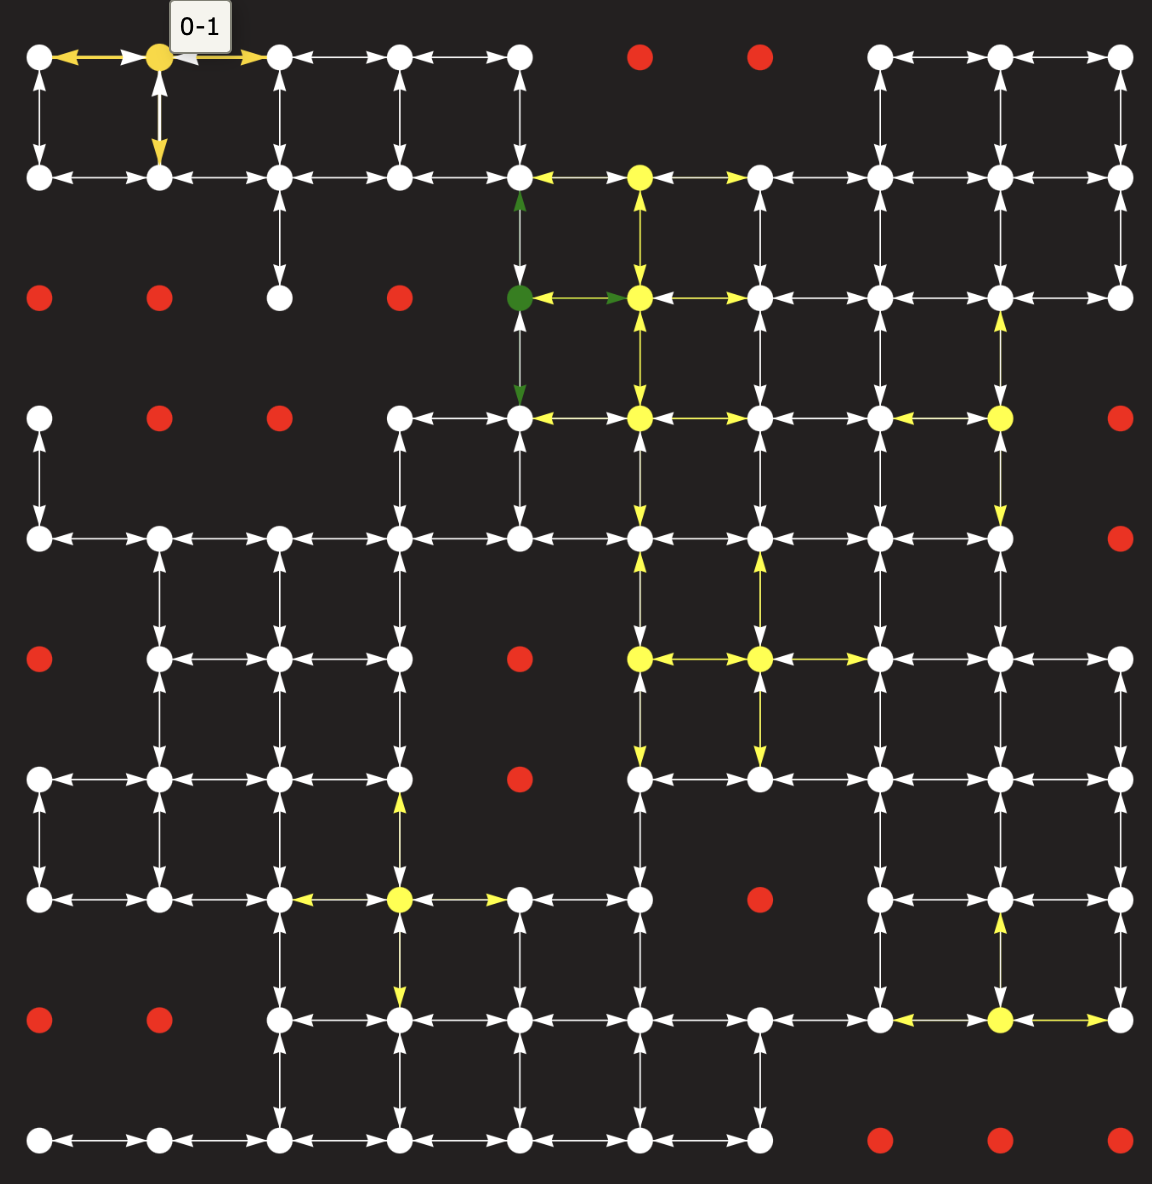

When we add the PS Agent into the Nav.Env. it should run its call() method 

In [152]:
Astar_PacManAgent3=ProblemSolvingMazeAgentAstar(initState,mazeWorldGraph2,goalState)

In [146]:
Astar_PacManAgent3.performance

82

In [147]:
PacmanWorld1.add_thing(Astar_PacManAgent3)

Hi
[(3.606, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
[(2.828, <Node (0, 2)>), (4.472, <Node (0, 0)>), (4.162, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(2.236, <Node (0, 3)>), (3.236, <Node (1, 2)>), (4.162, <Node (1, 1)>), (4.472, <Node (0, 0)>)]
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The child node <Node (1, 3)>.
[(2.0, <Node (0, 4)>), (2.4139999999999997, <Node (1, 3)>), (4.162, <Node (1, 1)>), (4.472, <Node (0, 0)>), (3.236, <Node (1, 2)>)]
The node (0, 4) is extracted from frontier:
The child node <Node (1, 4)>.
[(2.0, <Node (1, 4)>), (2.4139999999999997, <Node (1, 3)>), (4.162, <Node (1, 1)>), (4.472, <Node (0, 0)>), (3.236, <Node (1, 2)>)]
The node (1, 4) is extracted from frontier:
The child node <Node (1, 5)>.
The child node <Node (2, 4)>.
[(2.0, <Node (2, 4

In [138]:
PacmanWorld1.run()

step 1:
Agent decided to do right.
Agent in right with performance = 81
step 2:
Agent decided to do right.
Agent in right with performance = 80
step 3:
Agent decided to do right.
Agent in right with performance = 79
step 4:
Agent decided to do down.
Agent in down with performance = 78
step 5:
Agent decided to do down.
Agent in down with performance = 77
Agent reached all goals


## Tasks

In your PacMan World the food locations (Fixed Food Dots) are 10% of the space and distributed randomly (even the start and finish points may contain food).

1. Refine the given implementaion of the A* search by outputting the number of nodes expanded on the way to the goal ('green' cell) and the total cost of the path.

2. Implement a different version of the A* search based on:
* a **Manhattan distance** as the heuristic function

Compare the results with previous version (in the guidance above) of the algorithm. Visualize the path using differrent colors for its components (from the start to goal1, from the goal1 to.., etc.)

3. Create the refined PacMan World:
* there are 5 Ghosts (derived class from Thing class) hidden in the Maze (the PacMan Agent can't figure out the location of the ghost in advance). They are placead in the Maze randomly, but not in the start and finish points, the locations of Fixed Food Dots and Ghosts must also be different.

4. The Pac-man Agent must find all Fixed Food Dots and then find the finish point -> a set of goals (the results of task 2 are supposed to be used). The search of Fixed Food Dots must be rational: the 1st 'food' goal must be the most cost-optimal among other Food Dots. Try to design the appropriate heuristic for this case.

5. The inital perforamnce of Agent is 30% of space cells. After reaching a Fixed Food Dot the agent's performance doubles. 

6. If the Agent encounters Ghosts (based on its ability to regognize the types of things in the cell during perception), it fights. But only the strong Agent (with performance > 30% of space cells) can win. Otherwise the Agent will be killed by Ghost. If the Agent wins, he will lose 10% of his previous effectiveness after the battle.

7. Implemet IDA* search and apply it for tasks 4-5.

**Iterative-deepening A∗ search (IDA∗)**

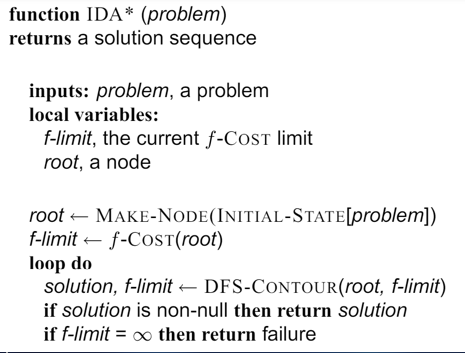

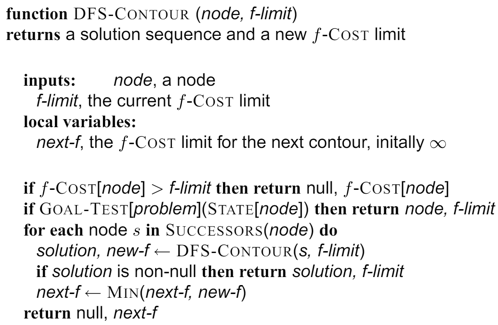